<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

NOTE: All CSVs are in the same directory as this notebook

In [2]:
#LOADING SAT_SCORES AND CHECKING FOR DESCRIPTION
satscores = pd.read_csv('/Users/grace/DSIWEEKTHREE/project2/project-two/sat_scores.csv')

In [3]:
satscores.head() #checking the header

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [4]:
satscores.describe() # Statistical summary

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


### 1.1 Make a pandas DataFrame object with pandas `.read_csv()` function

Take a look at the `.dtypes` attribute in the DataFrame. 

In [5]:
#satscores data type
satscores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

### 1.2 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

##### THE DATA SHOWS THE MEAN SCORES OF BOTH VERBAL AND MATH BASED ON THE RATE (NUMBER OF EXAMINEE) THAT TOOK THE EXAM.

In [6]:
#Header of the data
satscores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [7]:
# This reveals the state with the highest Verbal and Math Scores and the number of examinee that took the SAT.
satscores.loc[(satscores['Verbal'] == satscores['Verbal'].max()) & (satscores['Math'] == satscores['Math'].max()), :]

,State,Rate,Verbal,Math
47,IA,5,593,603


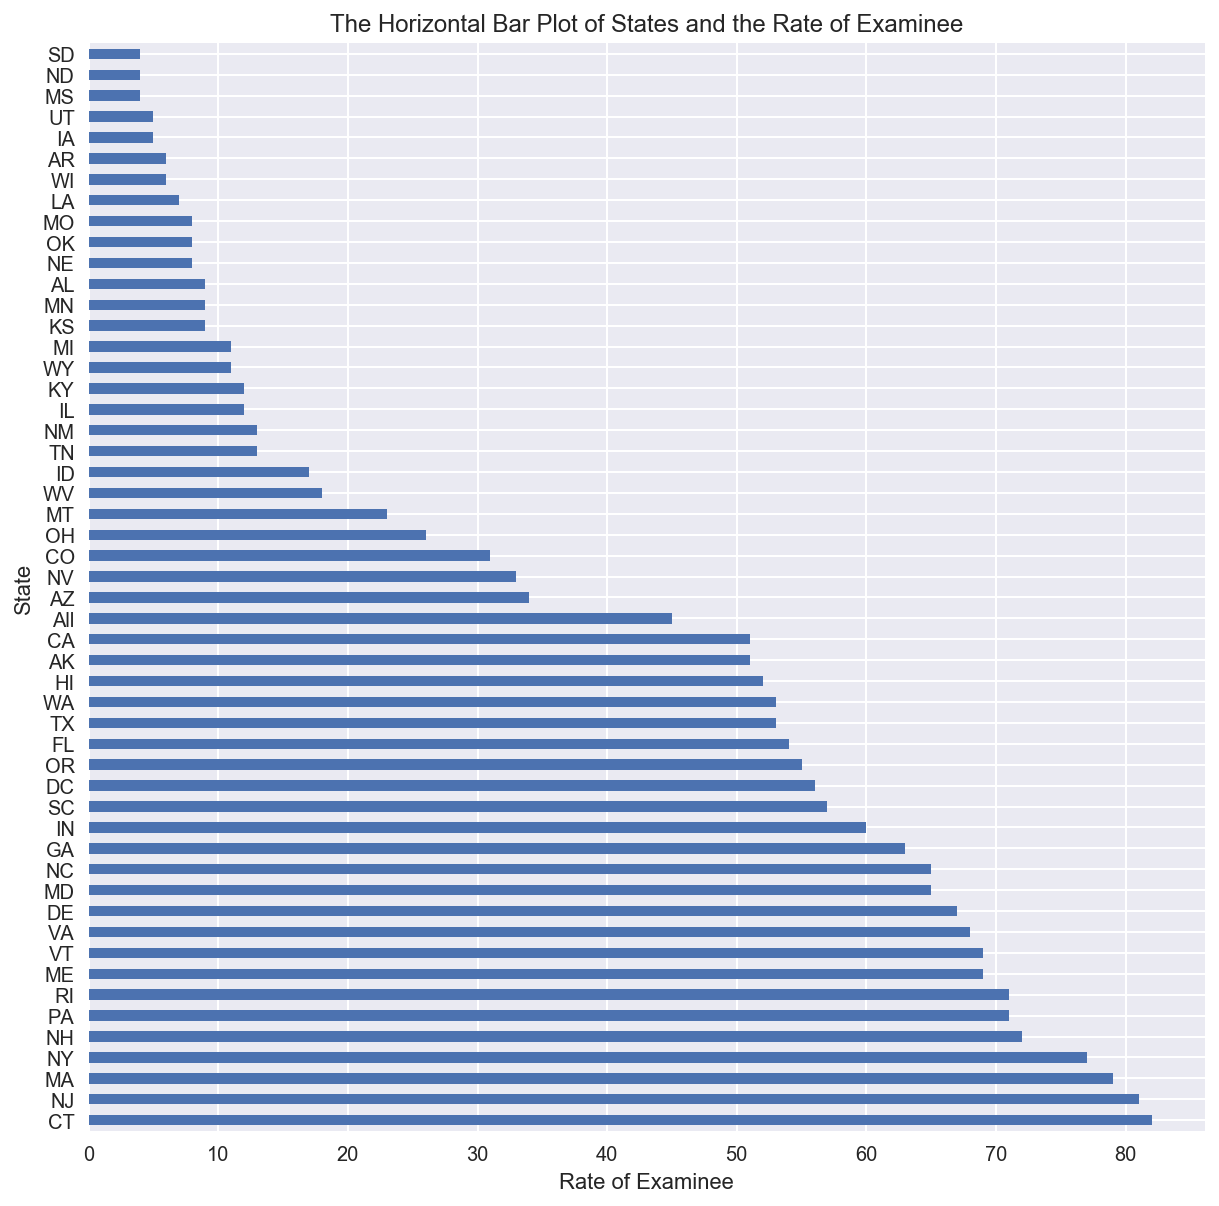

In [8]:
# Horizontal plot of Rate and State
fig, ax = plt.subplots(figsize = (10, 10))
satscores.groupby('State')['Rate'].sum().sort_values(ascending=False).plot('barh', ax = ax, title = 'The Horizontal Bar Plot of States and the Rate of Examinee')
plt.xlabel('Rate of Examinee')
plt.ylabel('State')

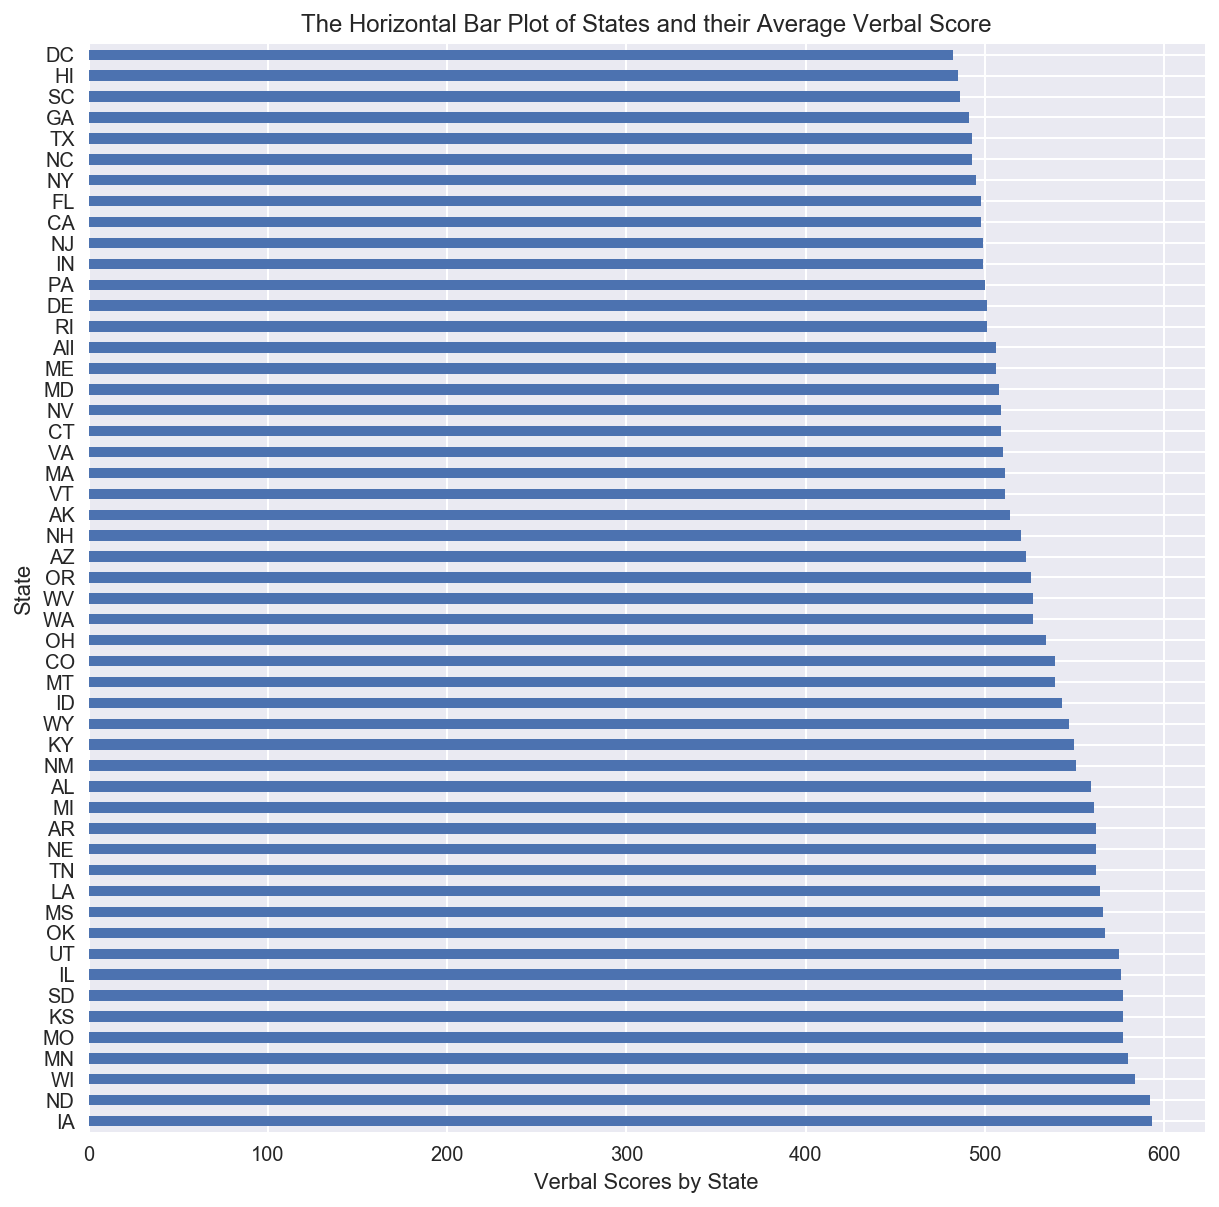

In [9]:
# Horizontal plot of States and their Verbal Scores.
fig, ax = plt.subplots(figsize = (10, 10))
satscores.groupby('State')['Verbal'].sum().sort_values(ascending=False).plot('barh', ax = ax, title = 'The Horizontal Bar Plot of States and their Average Verbal Score')
plt.xlabel('Verbal Scores by State')
plt.ylabel('State')

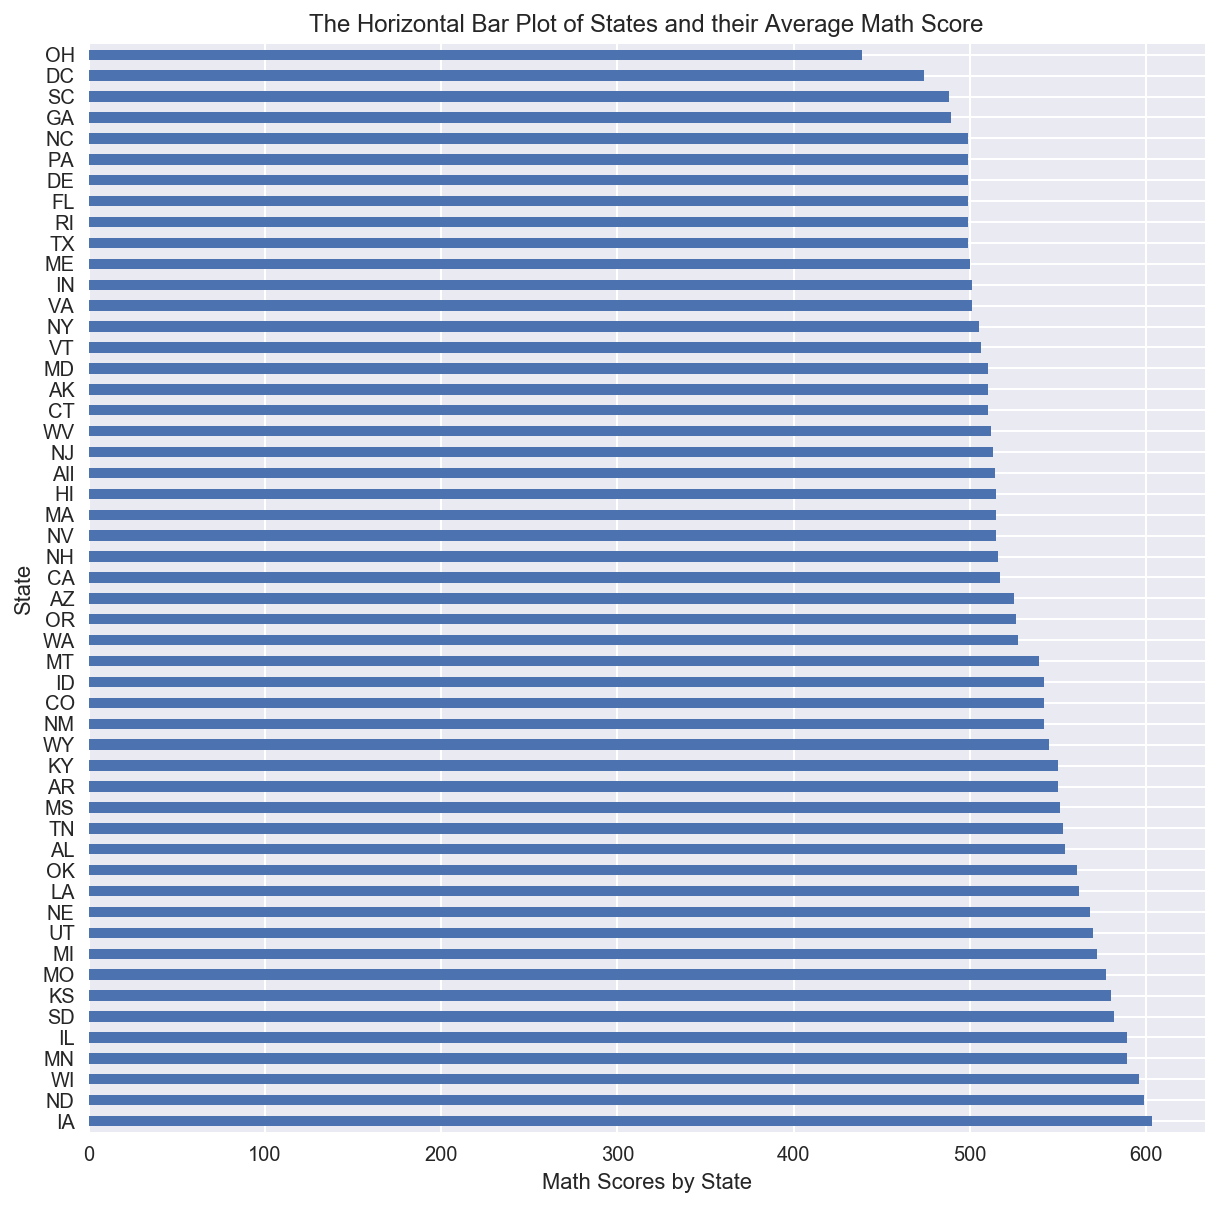

In [10]:
# Horizontal plot of States and their Math Scores.
fig, ax = plt.subplots(figsize = (10, 10))
satscores.groupby('State')['Math'].sum().sort_values(ascending=False).plot('barh', ax = ax, title = 'The Horizontal Bar Plot of States and their Average Math Score')
plt.xlabel('Math Scores by State')
plt.ylabel('State')

In [11]:
#Dimension of the data
satscores.shape

(52, 4)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

### satscoresdec = 
                    {
                    
                    'State': 'This is the State where the SAT Exam was taken, Type String', 
                    'Rate' : 'This is percentage of Students that wrote the SAT Exam in each state, Type Integer',
                    'Verbal': 'This is the Verbal Score, Type Integer', 
                    'Math' : 'This is the Math Score, Type Integer',
                    'Shape': 'This shows the dimension of the datasets, Type Tuples'
                              
                     }

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

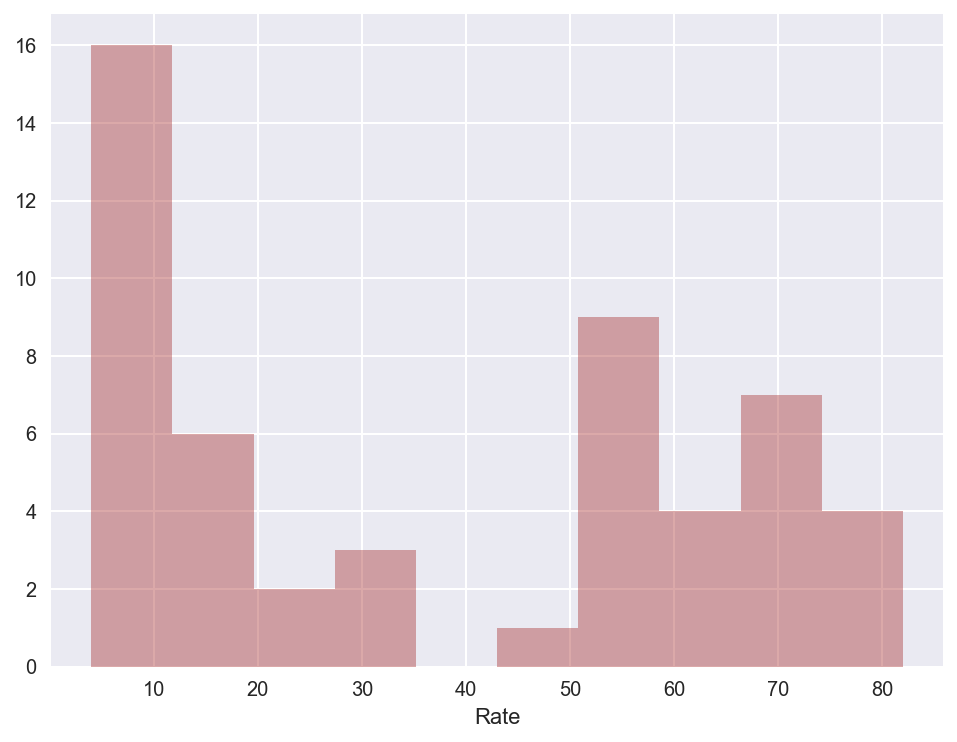

In [12]:
# Seaborn distplot for Sat_Scores distribution for the Rate variable.
fig, ax = plt.subplots(figsize = (8, 6))
sns.distplot(satscores['Rate'], bins = 10, kde = False, color = 'brown', ax=ax )

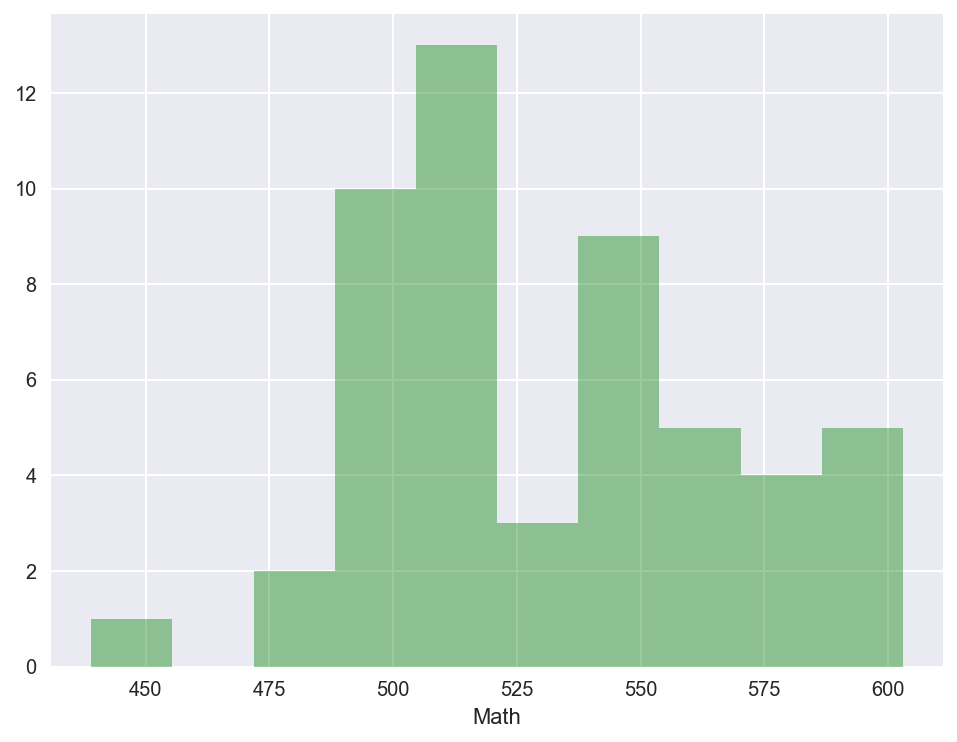

In [13]:
# Seaborn distplot for Sat_Scores distribution for the Math variable.
fig, ax = plt.subplots(figsize = (8, 6))
sns.distplot(satscores['Math'], bins = 10, kde = False, color = 'Green' )

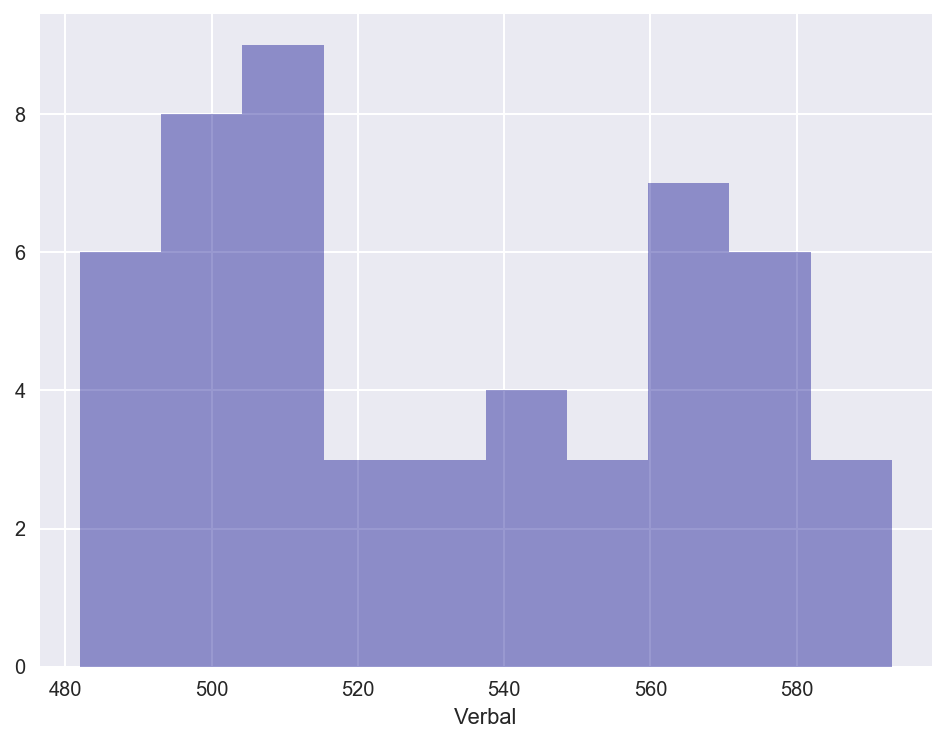

In [14]:
# Seaborn distplot for Sat_Scores distribution for the Verbal variable.
fig, ax = plt.subplots(figsize = (8, 6))
sns.distplot(satscores['Verbal'], bins = 10, kde = False, color = 'DarkBlue' )

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

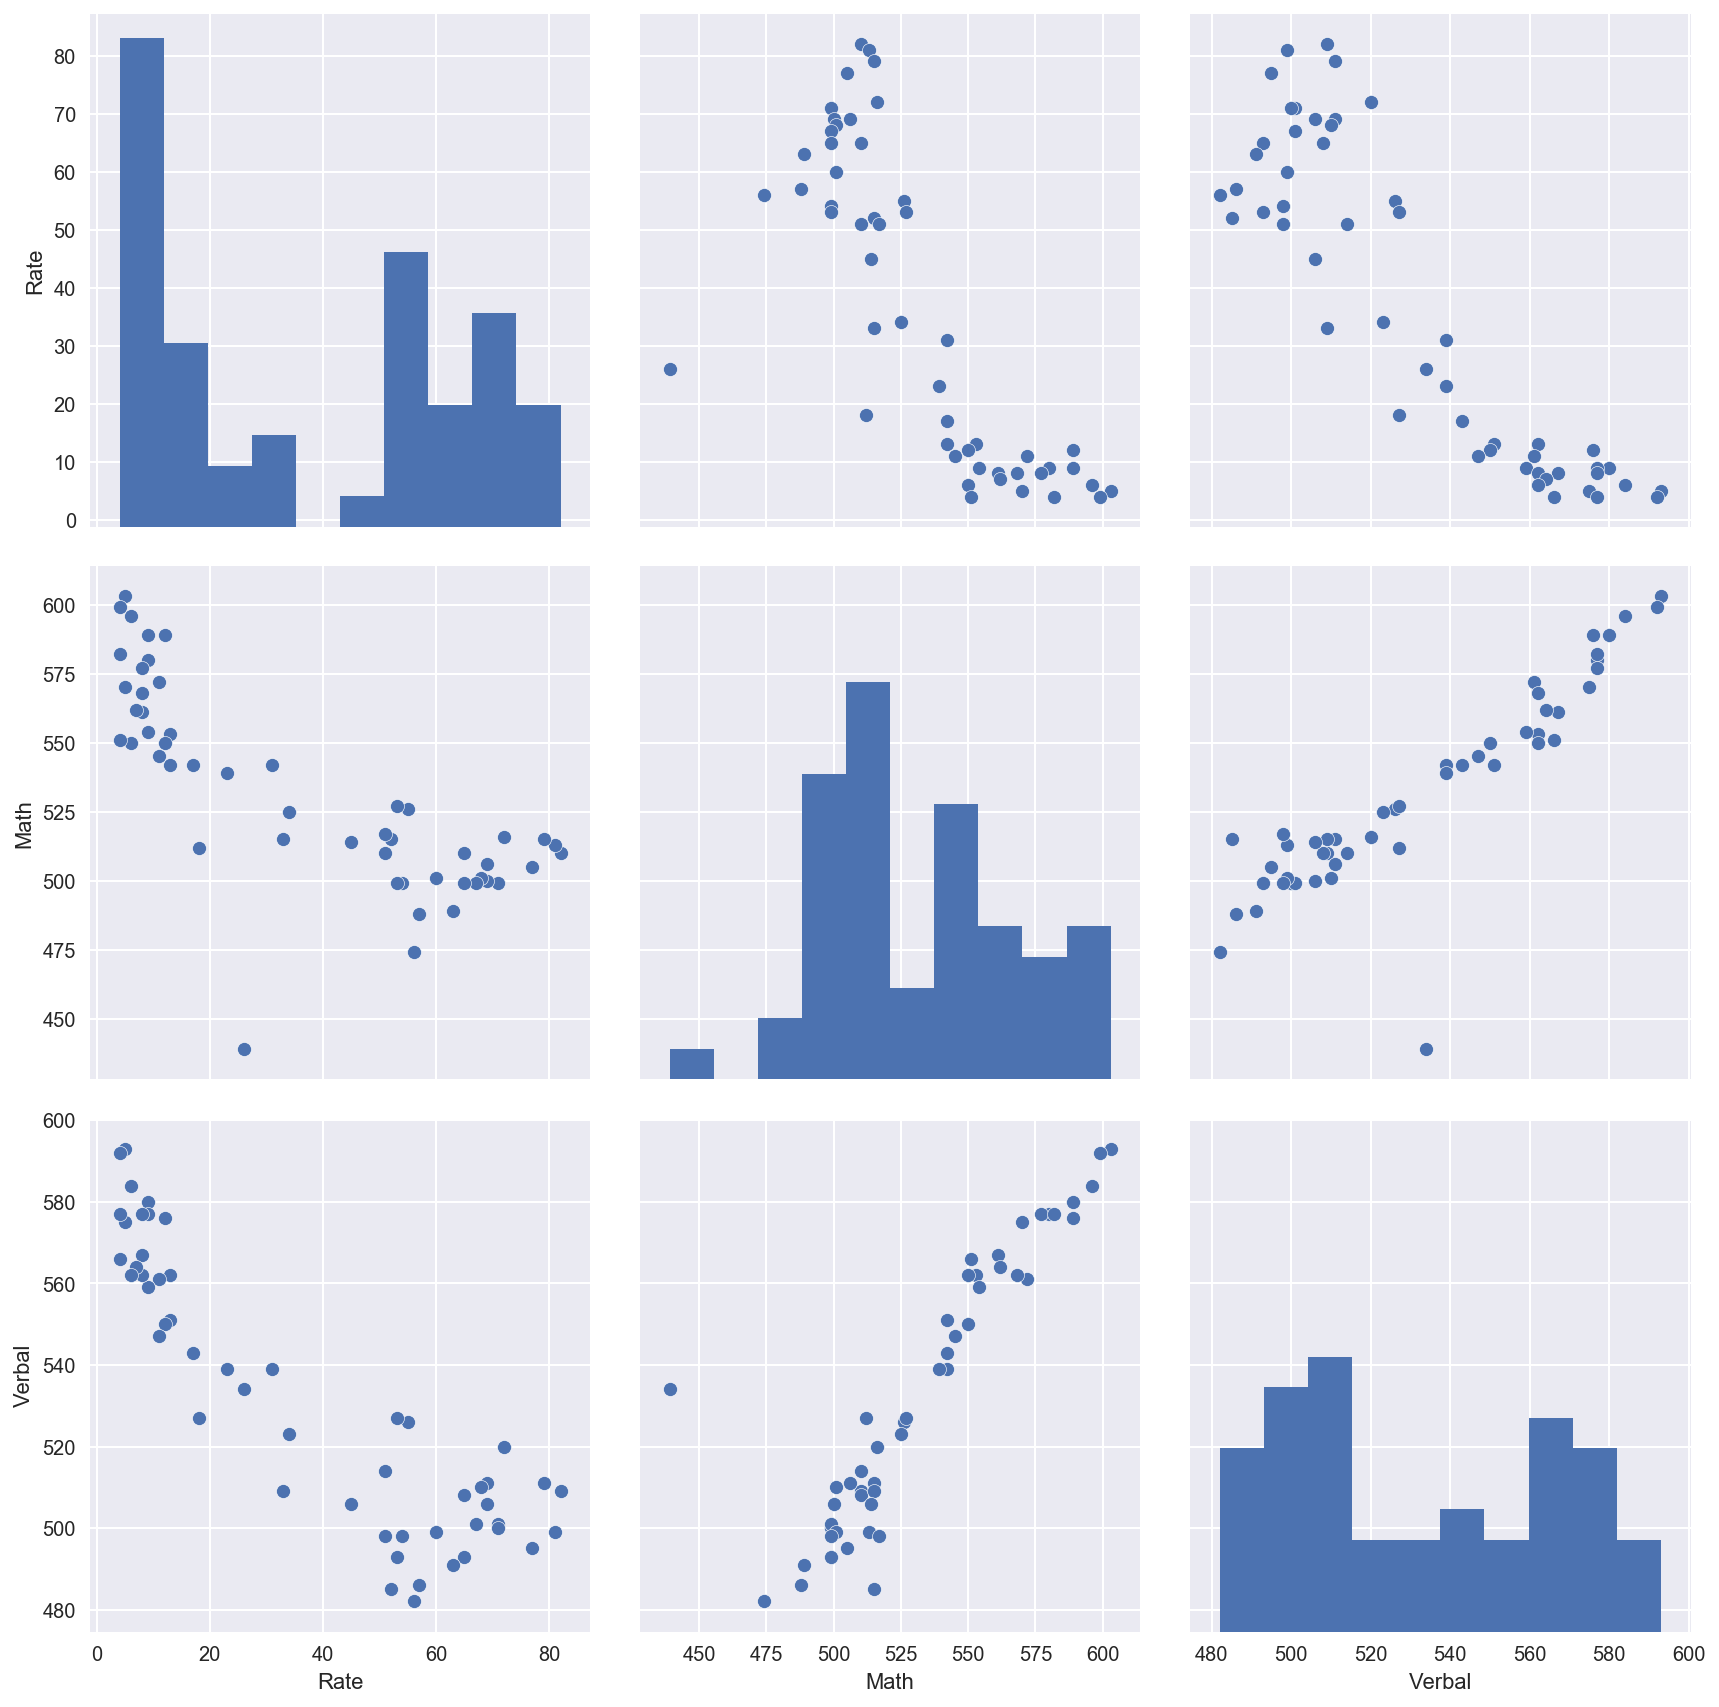

In [15]:
#Pairplot showing Joint distribution of the three  variables.
sns.pairplot(satscores[['Rate', 'Math', 'Verbal']], size = 4.0)

The graph shows that there is a partial inverse relationship between the rate and both of Verbal and Math scores. The plot shows a section of the data with high rate has low SAT Verbal and Math Scores while some section with low rate has high SAT Verbal and Math scores. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

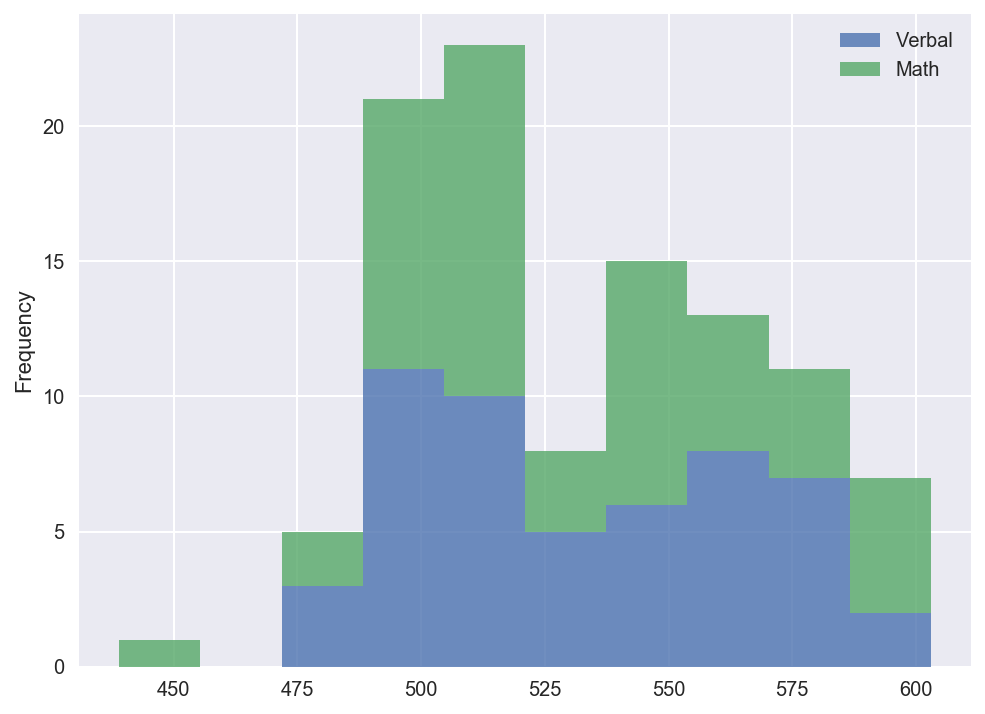

In [16]:
#Stacked Histogram of Verbal and Math
# satscoresVM = pd.DataFrame({'Verbal': np.random.randn(1000)-1,
#                        'Math': np.random.randn(1000)-1}, columns=['Verbal', 'Math'])

plt.figure();
fig, ax = plt.subplots(figsize = (8, 6))
satscores[['Verbal', 'Math']].plot.hist(alpha=0.8, stacked=True, bins=10, ax=ax)
   

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?


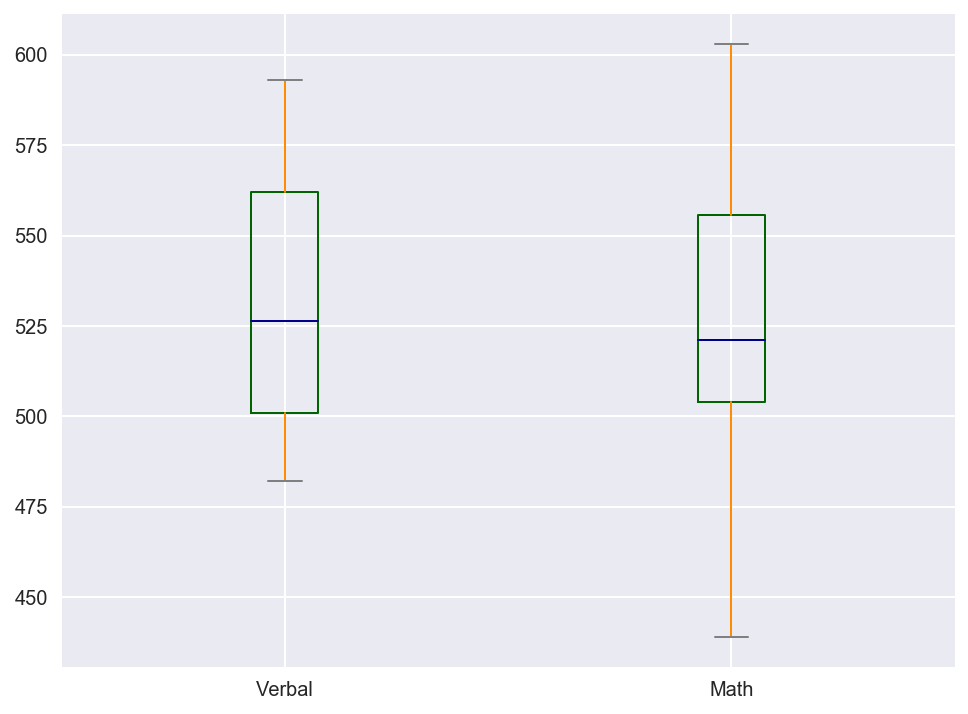

In [17]:
#Plot of Verbal and Math on the same boxplot.
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
          medians='DarkBlue', caps='Gray')
fig, ax = plt.subplots(figsize = (8, 6))

satscores[['Verbal', 'Math']].plot.box(color = color, ax=ax)

Boxplot gives us the five statistical summaries of our data sets. The maximum, minnimum, 75th , 25th and 50th (median) percentile while scatterplot or Histogram will only give us the frequecy of the data of each variable and in this case using Histogram or scatterplot can not give us the information we seek. 

Since the Rate variable shows us the percentile rate of students that wrote the exam, using a boxplot won't help 
us obtain any useful information rather an Histogram plot may help us get more information about the rate unless the rate column is normalized. Using a Histogram gives us the frequency of rate that is common among the states.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


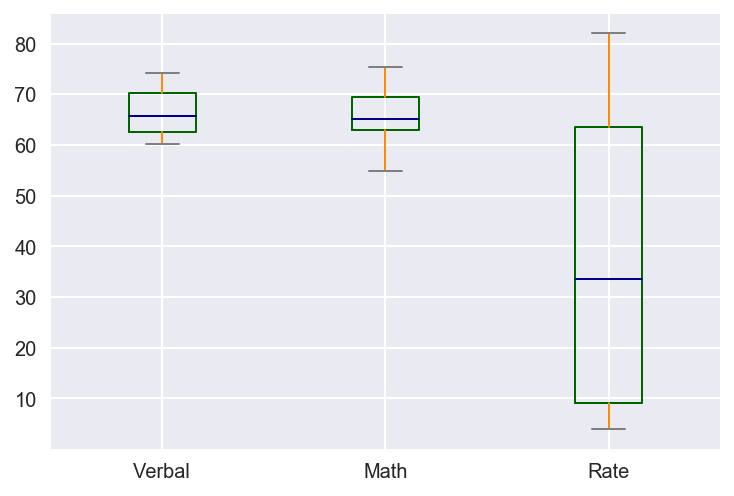

In [18]:
#Box Plot for Verbal, Math and Rate.
ax = plt.figure(figsize = (10,5))
# satscores2 = pd.DataFrame(np.random.rand(50,3), columns=[satscores['Verbal']/8, 'Rate', satscores['Math']/8])
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
          medians='DarkBlue', caps='Gray')
satscores2 = satscores.copy()
satscores2['Math'] = satscores2['Math'] / 8
satscores2['Verbal'] = satscores2['Verbal'] / 8
satscores2[['Verbal', 'Math', 'Rate']].plot.box(color = color)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have an average `Verbal` score greater than the average of `Verbal` scores across the entire dataset

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [20]:
#The Mean verbal Score
satscores['Verbal'].mean()

532.0192307692307

In [21]:
# List of States with Verbal Scores greater than the overall mean of Verbal scores.
satscores.loc[(satscores['Verbal'] > satscores['Verbal'].mean()), :]

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


### 5.2 Find the list of states that have a median `Verbal` score greater than the median of `Verbal` scores across the entire dataset

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [22]:
#The Verbal median score
satscores['Verbal'].median()

526.5

In [23]:
# List of States with Verbal Scores greater than the overall median of Verbal scores.
satscores.loc[(satscores['Verbal'] > satscores['Verbal'].median()), :]

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [24]:
#Difference between Verbal and Math Scores
satscores['VM_Diff'] = satscores['Verbal'] - satscores['Math']

In [26]:
satscores.head()

,State,Rate,Verbal,Math,VM_Diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [27]:
#5.4.1 : Verbal > Math. States with the greatest difference between Verbal and Math Scores.
SSDV = satscores.loc[(satscores['Verbal'] > satscores['Math']) & (satscores['VM_Diff']), :]

In [34]:
# Sorting the Dataset.
SSDV.sort_values(by = 'VM_Diff', ascending=False)

,State,Rate,Verbal,Math,VM_Diff
27,OH,26,534,439,95
29,WV,18,527,512,15
50,MS,4,566,551,15
9,VA,68,510,501,9
31,TN,13,562,553,9
32,NM,13,551,542,9
7,VT,69,511,506,5
39,AL,9,559,554,5
46,UT,5,575,570,5
6,PA,71,500,499,1


In [41]:
#5.4.2 : Math > Verbal 
SSDM = satscores.loc[(satscores['Math'] > satscores['Verbal']) & (satscores['VM_Diff']), :]

In [42]:
# Header of SSDV
SSDM.sort_values(by='VM_Diff', ascending=False)

,State,Rate,Verbal,Math,VM_Diff
0,CT,82,509,510,-1
18,FL,54,498,499,-1
26,CO,31,539,542,-3
38,KS,9,577,580,-3
48,SD,4,577,582,-5
49,ND,4,592,599,-7
37,MN,9,580,589,-9
36,MI,11,561,572,-11
33,IL,12,576,589,-13
23,CA,51,498,517,-19


In [43]:
# Header of the dataframe where Verbal is greater than Math.
SSDV.sort_values(by = 'VM_Diff', ascending=False).head(3)

,State,Rate,Verbal,Math,VM_Diff
27,OH,26,534,439,95
29,WV,18,527,512,15
50,MS,4,566,551,15


In [44]:
# Header of the dataframe where Math is greater than Verbal.
SSDM.sort_values(by='VM_Diff', ascending=False).head(3)

,State,Rate,Verbal,Math,VM_Diff
0,CT,82,509,510,-1
18,FL,54,498,499,-1
26,CO,31,539,542,-3


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).


- Use seaborn's `.heatmap` method to add some color to the matrix
- Set `annot=True`


In [45]:
#Correlation matrix of the variables
corr_satscores = satscores[['Rate', 'Verbal', 'Math']].corr()
corr_satscores

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


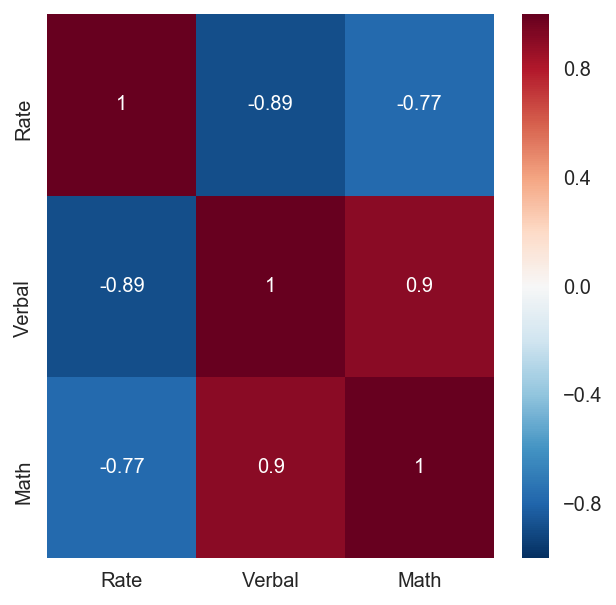

In [50]:
# Using heatmap method to show correlations between the variables.
fig, ax = plt.subplots(figsize=(5, 5))
# mask = np.zeros_like(corr_satscores, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_satscores, annot=True, ax = ax) #mask = mask)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [51]:
#Summary statistics
satscores.describe()

,Rate,Verbal,Math,VM_Diff
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


##### COUNT : Shows the frequency of each variables.
##### MEAN : Shows the average of each variables.
##### STD : Shows the deviation of each variable from its average(mean).
##### MIN : The minimum value that exist in each variable.
##### 25% : Shows the 25th percentile of each variables.
##### 50% : Also known as the Median. It shows the 50% percentile of the variables.
##### 75% : Shows the 75% percentile of each variables.
##### MAX: Shows the maximum value that exist in each variable.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [52]:
# Covariance matrix
cov_satscores = satscores[['Rate', 'Verbal', 'Math']].cov()
cov_satscores

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [111]:
#Reading the data
drug = pd.read_csv('drug-use-by-age.csv')

In [112]:
# Checking the header of the data
drug.head()

# YES. THE DATA REQUIRES CLEANING BECAUSE EMPTY FIELDS.
# IT WILL AFFECT IT IN THE SENSE THAT REPLACING THE EMPTY FIELD WITH NULL WILL AFFECT THE FREQUENCY COUNT.

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [113]:
#Replace the empty fields in the dataset
drug.replace(to_replace='-', value=np.nan)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [114]:
drug.shape #checking the dimensions of the dataset

(17, 28)

In [115]:
drug.columns #Previewing the columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [116]:
#Descriptive statistics of the drug data
drug.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


In [117]:
drug.info() #Columns informations and datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

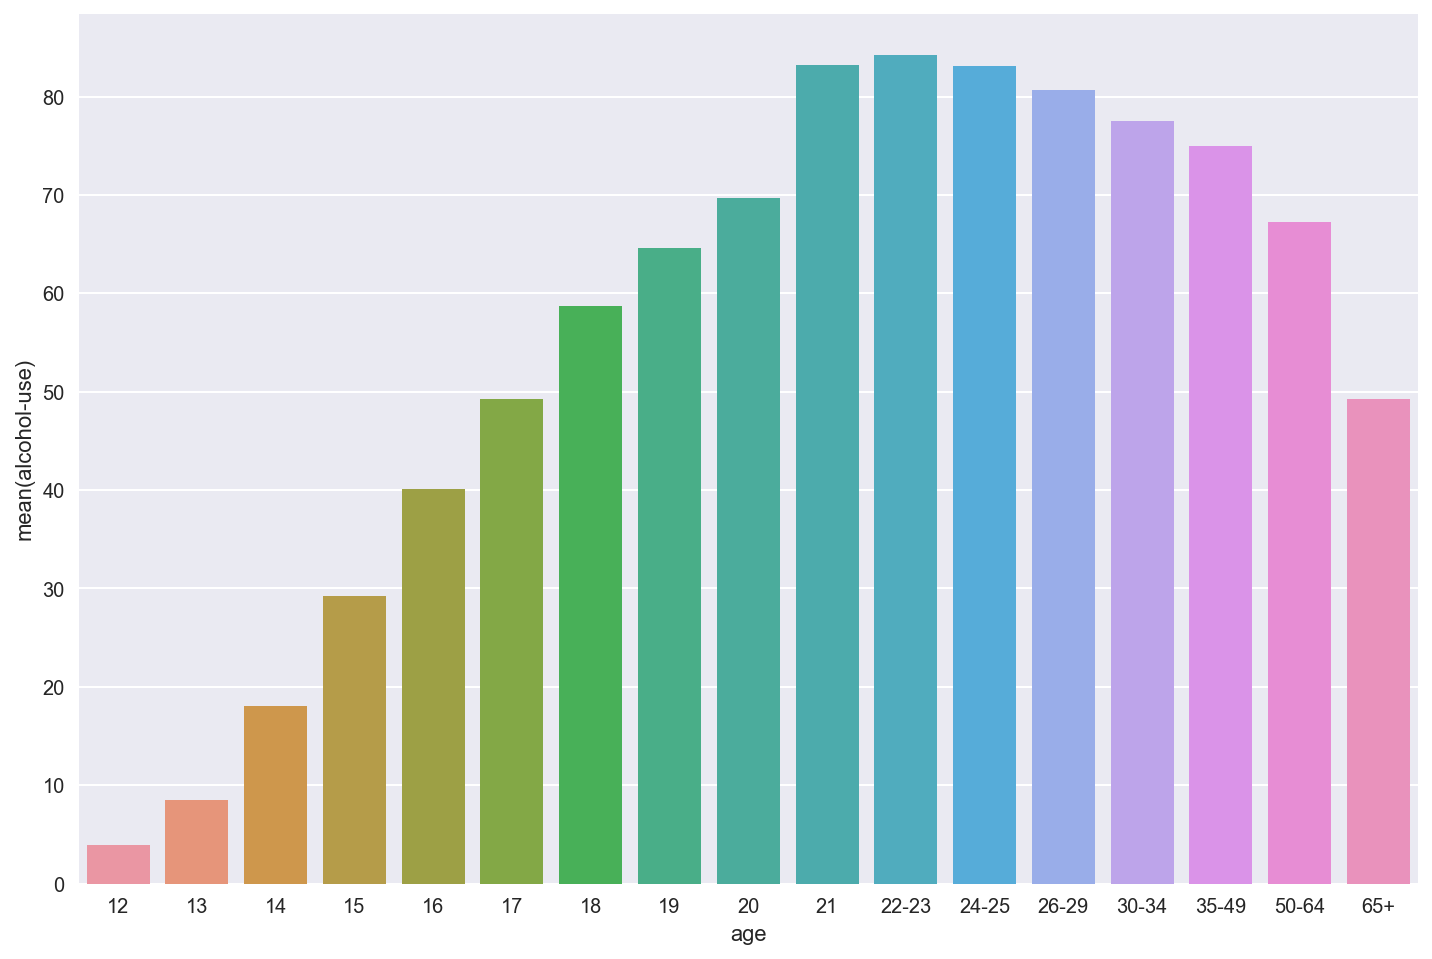

In [118]:
# A barplot of Age against alcohol use.
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='age', y='alcohol-use', data=drug, ax=ax)

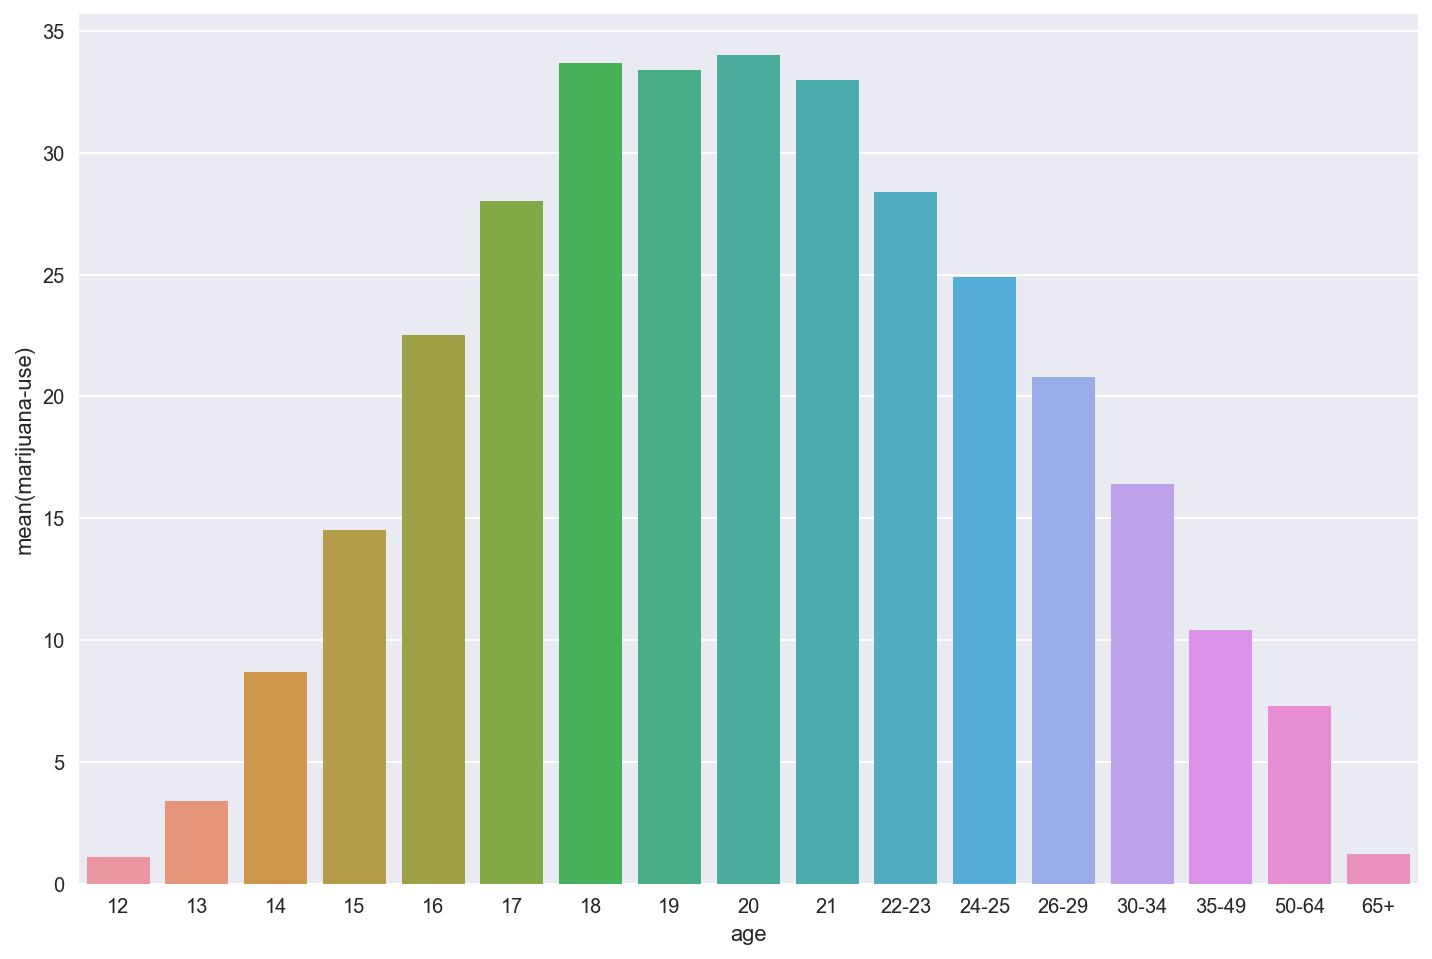

In [119]:
# A barplot of Age against alcohol use.
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='age', y='marijuana-use', data=drug,  ax=ax)

In [120]:
#correlation among the variables of the drug dataset
drug_corr = drug[['age', 'alcohol-use', 'marijuana-use', 'cocaine-use', 'crack-use','heroin-use', 
                  'hallucinogen-use', 'inhalant-use', 'pain-releiver-use', 'oxycontin-use', 
                  'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use'  ]].corr()

In [121]:
drug_corr #correlation matrix

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
alcohol-use,1.000000,0.594165,0.773458,0.877378,0.677614,0.463702,-0.648248,0.617523,0.589219,0.735785,0.582241,0.682531,0.318268
marijuana-use,0.594165,1.000000,0.883789,0.620670,0.711613,0.959353,0.127336,0.966226,0.971733,0.935199,0.968096,0.870446,0.616766
cocaine-use,0.773458,0.883789,1.000000,0.835727,0.899944,0.855668,-0.214609,0.906638,0.865626,0.920430,0.923954,0.889353,0.461914
crack-use,0.877378,0.620670,0.835727,1.000000,0.750790,0.556222,-0.543499,0.652764,0.603003,0.772651,0.618008,0.694324,0.438421
heroin-use,0.677614,0.711613,0.899944,0.750790,1.000000,0.683674,-0.215961,0.805868,0.775321,0.818583,0.808024,0.816620,0.333649
hallucinogen-use,0.463702,0.959353,0.855668,0.556222,0.683674,1.000000,0.173030,0.909333,0.916777,0.862900,0.940008,0.780071,0.518700
inhalant-use,-0.648248,0.127336,-0.214609,-0.543499,-0.215961,0.173030,1.000000,0.092045,0.110492,-0.103745,0.108381,-0.059903,0.110611
pain-releiver-use,0.617523,0.966226,0.906638,0.652764,0.805868,0.909333,0.092045,1.000000,0.976445,0.959283,0.961484,0.918051,0.636666
oxycontin-use,0.589219,0.971733,0.865626,0.603003,0.775321,0.916777,0.110492,0.976445,1.000000,0.955081,0.947492,0.895790,0.625929
tranquilizer-use,0.735785,0.935199,0.920430,0.772651,0.818583,0.862900,-0.103745,0.959283,0.955081,1.000000,0.909784,0.936270,0.674618


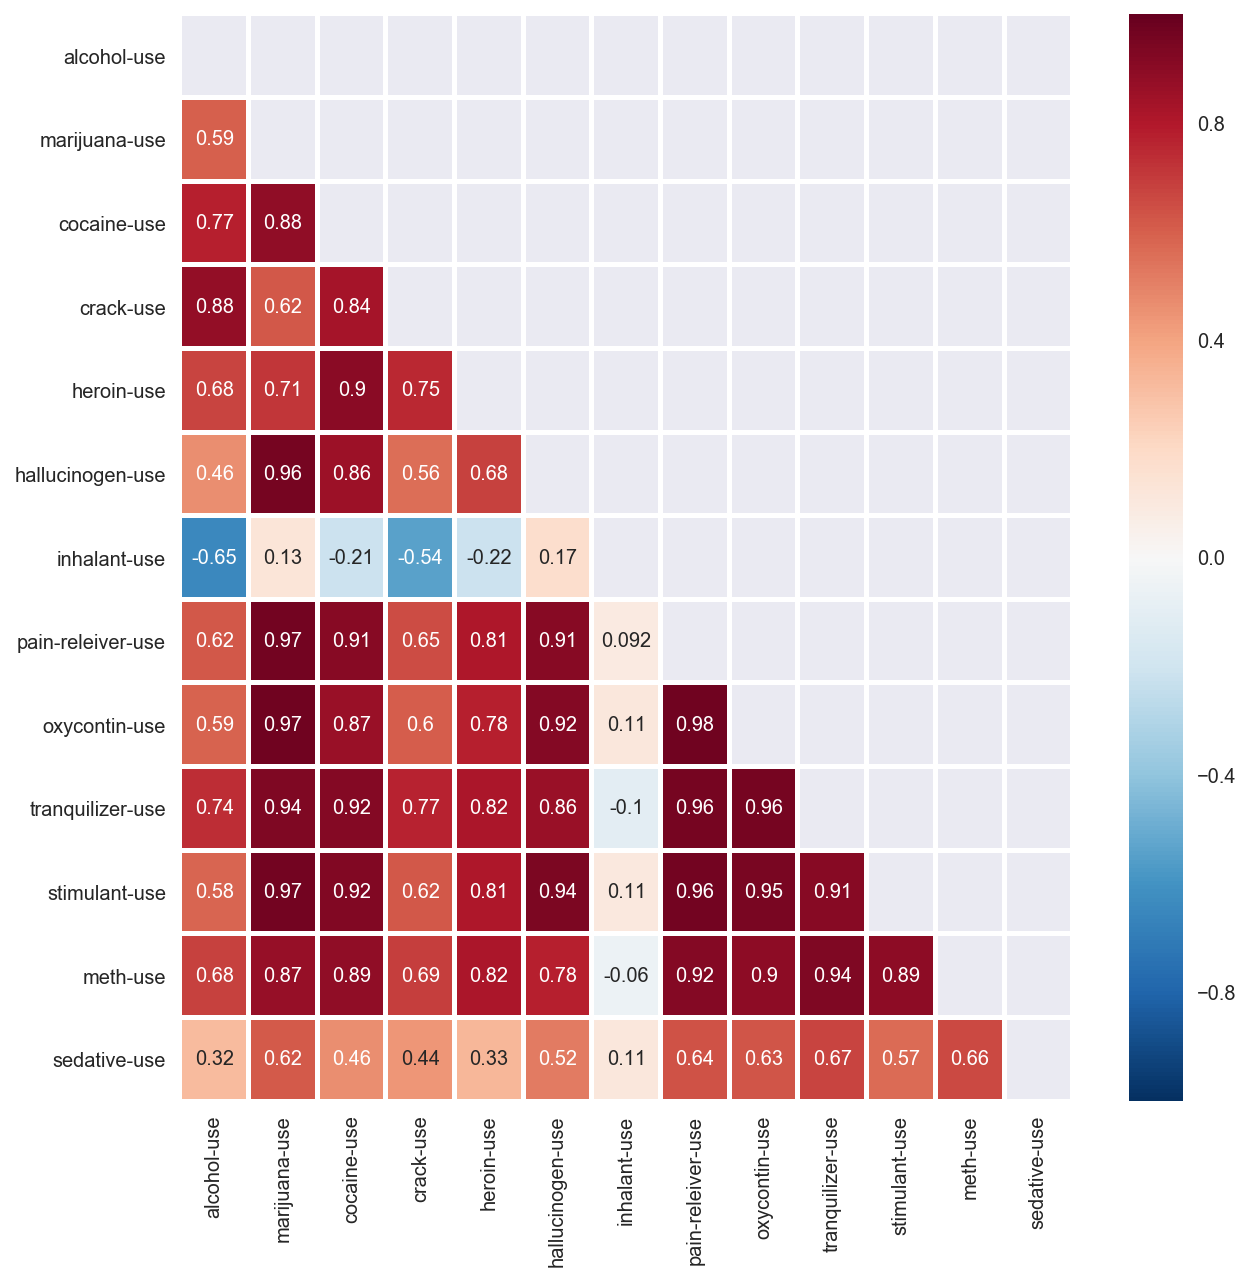

In [122]:
#Plot to show the correlation among the variables of the drug dataset
fig, ax = plt.subplots(figsize=(10, 10))
mask = np.zeros_like(drug_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(drug_corr, linewidths=2, annot=True, mask=mask, ax=ax)

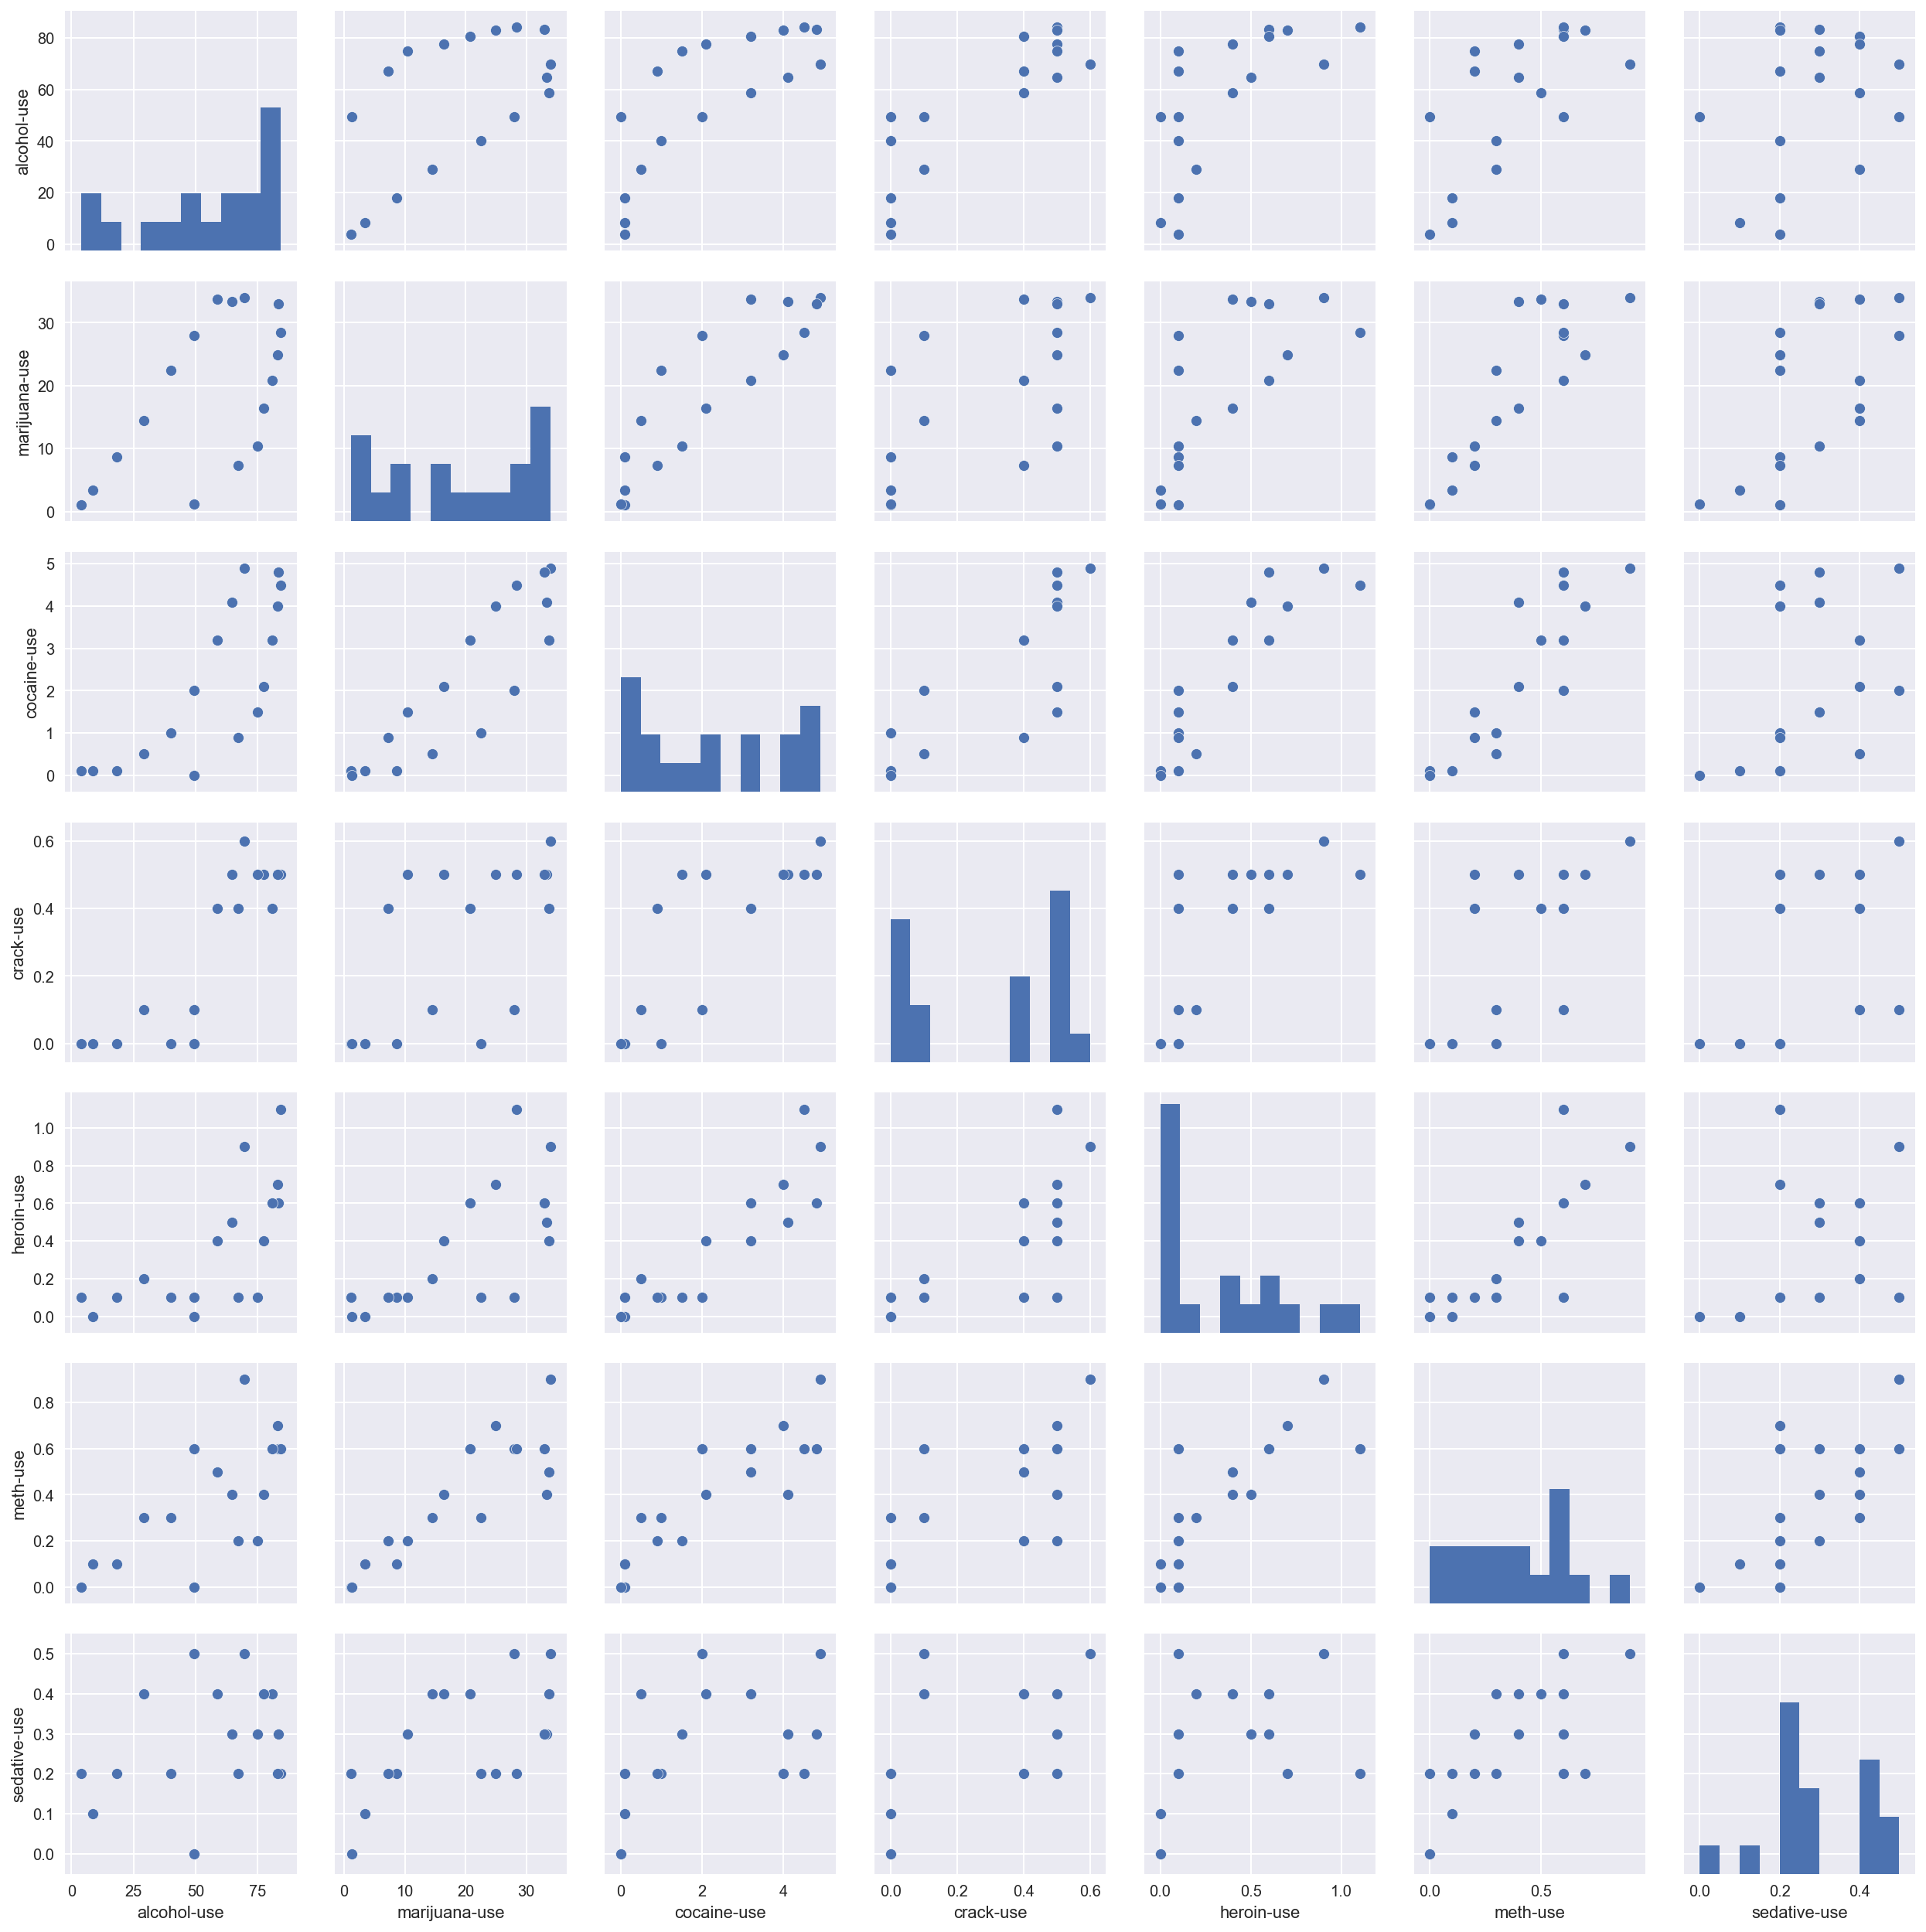

In [123]:
#Pair plot of the drug use
sns.pairplot(drug[['alcohol-use', 'marijuana-use', 'cocaine-use', 'crack-use','heroin-use', 
                  'meth-use', 'sedative-use']])

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [ ]:
# There is a positive correlation between cocaine and heroine use.
# Between those that used heroine and meth exist a positive correlation.
# Crack use is almost bi-modal
# Heroine-use is positively skewed.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [124]:
# Code
#7.3.1 WHAT IS THE RELATIONSHIP BETWEEN PERCENTAGE USE OF CRACK-USE AND HEROINE-USE IN THE LAST 12 MONTHS?

# H0: CRACK-USE <= HEROINE-USE
# H1: CRACK-USE > HEROINE-USE

In [125]:
#7.3.2 TESTING HYPOTHESIS
# Calculating the mean difference between crack-use and heroine-use
crack = np.array(drug['crack-use'])
heroin = np.array(drug['heroin-use'])

Mean_diff = np.mean(crack)-np.mean(heroin)
Mean_diff

-0.058823529411764719

In [128]:
#Calculating the t-test and the p-value
import scipy.stats as stats

In [129]:
#Calculating t-stat and p-value.
t_stat, pvalue = stats.ttest_ind(crack, heroin)
print(t_stat, pvalue)

-0.593521459991 0.557004581737


In [130]:
#Interpreting the result with an alpha = 0.05 or 95% confidence interval
#Since our p-value of 0.56 is greater than our alpha value of 0.05, then fail to reject the Null Hypothesis
# that CRACK-USE <= HEROIN-USE and therefore reject the ALTERNATIVE HYPOTHESIS. 

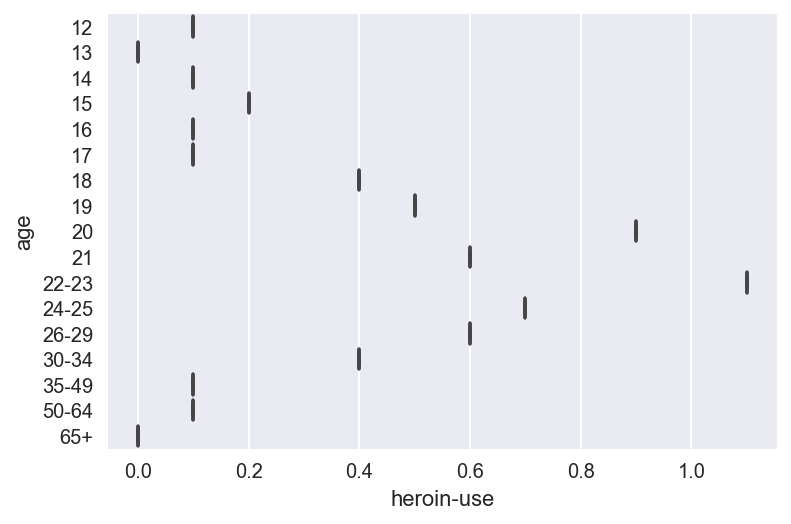

In [131]:
# Boxplot showing the percentage use of crack and heroin.
sns.boxplot(drug['heroin-use'], drug['age'])

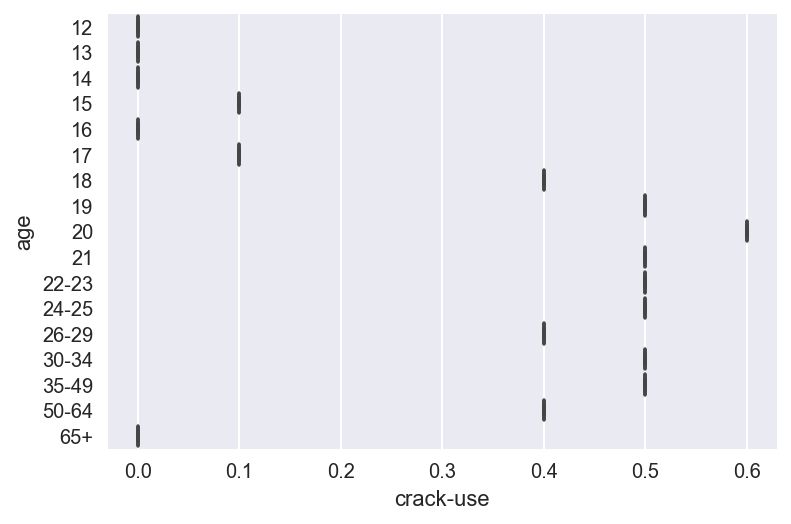

In [132]:
#Boxplot of crack-use by age.
sns.boxplot(drug['crack-use'], drug['age'])

   REPORT

1. Based on the EDA on the Hypothesis testing above, it is clear that the percentage of those that use heroine is 
   higher than the percentage of those that used crack.

2. About 10% of those in the age group of 12-17 yrs used heroin the most in the last 12 months.

3. About 50% of people between the ages of 19-49 yrs used crack the most in the last 12 months.

4. People within the ages of 18-49 constitute the higher percenatge of those that used crack.


**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the SAT dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [133]:
# 8.1 - Sat scores Rate variable
sat_rate = satscores['Rate']

In [134]:
#Describing the satscores data.
satscores.describe() 

,Rate,Verbal,Math,VM_Diff
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


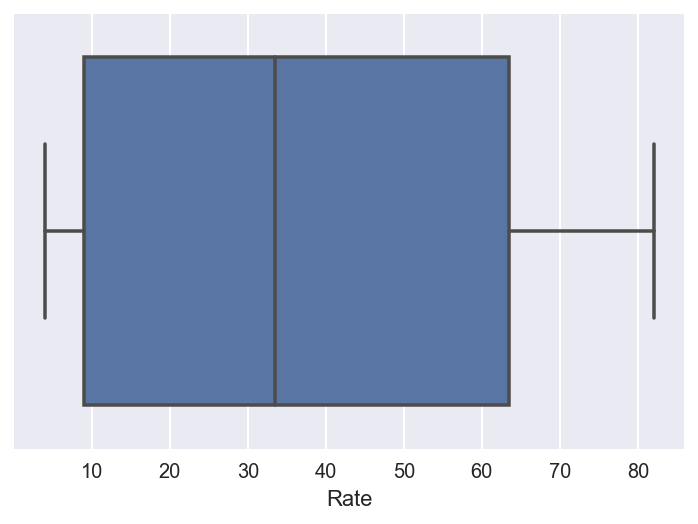

In [135]:
#Boxplot of the rate column
sns.boxplot(satscores['Rate'])

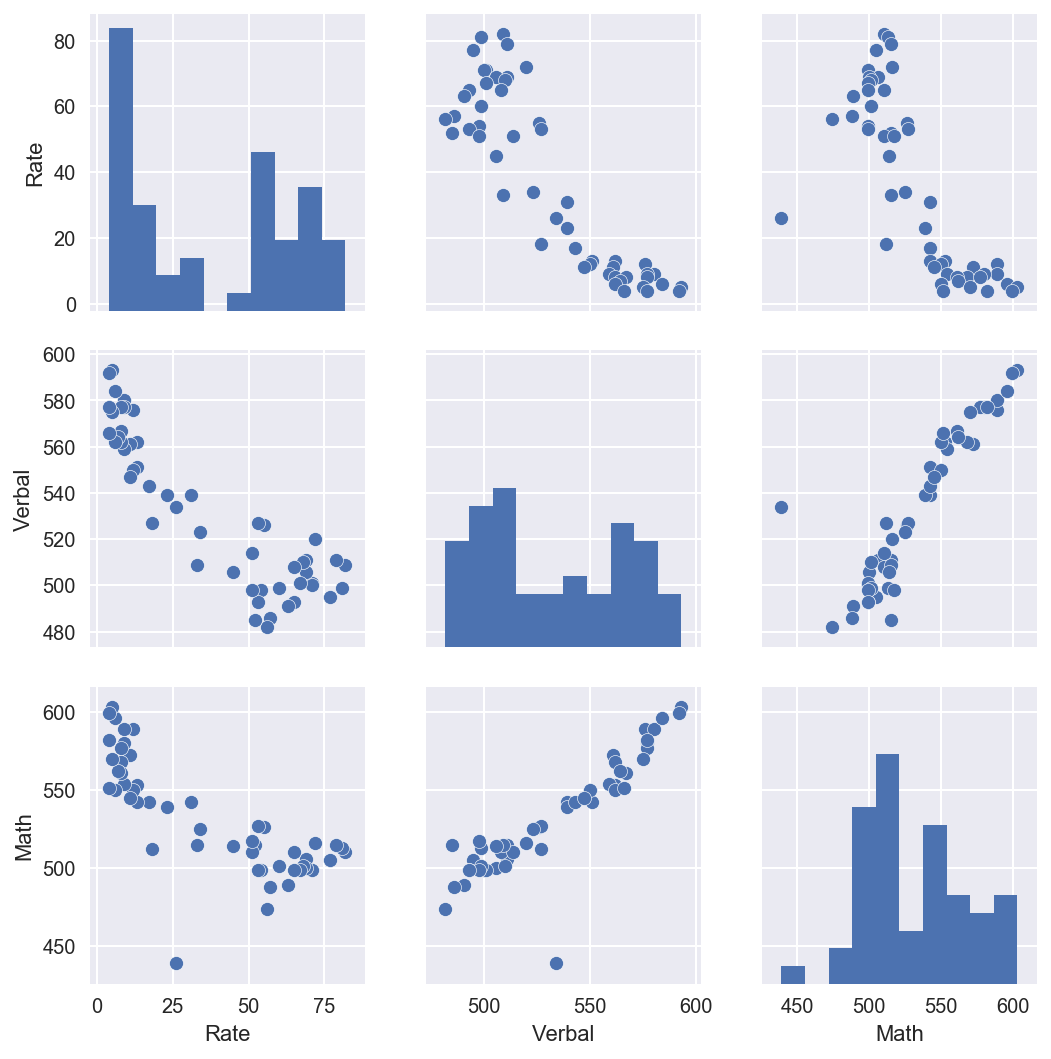

In [136]:
# 8.2 - YES. There are outliers
# OUTLIERS : They are the set of datas that lies in abnormal distance in this sample data. 
sns.pairplot(satscores[['Rate', 'Verbal', 'Math']])

# The Outlier in the data set is shown from the pairplot where the Verbal score is between 520 and 540, 
# and Math score between 430-450.  This score has a rate of appoximately 25  percent.

In [137]:
8.3 #Print out the outlier in the dataset.
sat_outlier = satscores.loc[(satscores['Verbal'] <= 540) & (satscores['Math'] <= 440), :]
sat_outlier

,State,Rate,Verbal,Math,VM_Diff
27,OH,26,534,439,95


In [138]:
#8.4 Removing the outlier from the dataset.
satscores1 = satscores.loc[(satscores['Verbal'] != 534) & (satscores['Math'] != 439), :]

In [139]:
#new header without the outlier
satscores1.head()

,State,Rate,Verbal,Math,VM_Diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


In [140]:
# Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. 
# What is different about them and why?

print(satscores.describe(),'\n\n', satscores1.describe())

            Rate      Verbal        Math    VM_Diff
count  52.000000   52.000000   52.000000  52.000000
mean   37.153846  532.019231  531.500000   0.519231
std    27.301788   33.236225   36.014975  15.729939
min     4.000000  482.000000  439.000000 -30.000000
25%     9.000000  501.000000  504.000000  -6.000000
50%    33.500000  526.500000  521.000000   0.000000
75%    63.500000  562.000000  555.750000   4.250000
max    82.000000  593.000000  603.000000  95.000000 

             Rate      Verbal        Math    VM_Diff
count  51.000000   51.000000   51.000000  51.000000
mean   37.372549  531.980392  533.313725  -1.333333
std    27.527412   33.565751   33.890111   8.387292
min     4.000000  482.000000  474.000000 -30.000000
25%     9.000000  501.000000  505.500000  -6.000000
50%    34.000000  526.000000  525.000000   0.000000
75%    64.000000  562.000000  557.500000   4.000000
max    82.000000  593.000000  603.000000  15.000000


 The Mean of the Verbal scores for the original dataset is higher than that of the new dataset 
 because the Verbal score of the outlier is greater than the Mean Verbal score.

 Similarly, The Mean of the Math scores for the original dataset is lower than that of the new dataset 
 because the Math score of the outlier is less than the Mean Math score.

 Also, The Median Verbal score of the Original dataset is higher than that of the new dataset because of the high 
 Verbal score of the outlier. Similarly, the Median Math score of the original dataset is lower than that 
 of the new data because of the low Math score of the outlier. 

 Lastly, the Verbal standard deviation of the original dataset is lower than that of the new dataset because the 
 deviation from the mean of the original dataset is lower as a result of the high Verbal score of the outlier. 
 The Math Standard deviation of the original dataset is higher than that of the new dataset because of the low Math
 score of the outlier and since the outlier has been removed from the new dataset, it results in a low Math STD.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [141]:
#9.1 How does the spearman correlation compare to the pearson correlation?

# The Pearson correlation evaluates the linear relationship between two continuous variables while  the 
#Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data. 

#Calculating the pearson correlation
sat_corr = satscores[['Verbal', 'Math']].corr()
sat_corr

,Verbal,Math
Verbal,1.000000,0.899871
Math,0.899871,1.000000


In [142]:
#Calculating the Spearman correlation

stats.spearmanr(satscores['Verbal'], satscores['Math']) 

SpearmanrResult(correlation=0.90520488479402839, pvalue=3.2352319597775181e-20)

In [143]:
# Other methods of calculating the Spearman Correlation Coefficient.
#Creating a new column

satscores['Verbal_sort'] = satscores['Verbal'].sort_values()
satscores['Math_sort'] = satscores['Math'].sort_values()

#Sorting The Verbal and Math Score
satscores.sort_values(by= ['Verbal', 'Math'], ascending=False)

,State,Rate,Verbal,Math,VM_Diff,Verbal_sort,Math_sort
47,IA,5,593,603,-10,593,603
49,ND,4,592,599,-7,592,599
44,WI,6,584,596,-12,584,596
37,MN,9,580,589,-9,580,589
48,SD,4,577,582,-5,577,582
38,KS,9,577,580,-3,577,580
42,MO,8,577,577,0,577,577
33,IL,12,576,589,-13,576,589
46,UT,5,575,570,5,575,570
41,OK,8,567,561,6,567,561


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [144]:
# 9.1: Converting Rate to percentiles in the sat scores as a new column in our dataset.

satscores['Percentile']= [stats.percentileofscore(satscores['Rate'], i) for i in satscores['Rate']]
satscores.tail()

,State,Rate,Verbal,Math,VM_Diff,Verbal_sort,Math_sort,Percentile
47,IA,5,593,603,-10,593,603,8.653846
48,SD,4,577,582,-5,577,582,3.846154
49,ND,4,592,599,-7,592,599,3.846154
50,MS,4,566,551,15,566,551,3.846154
51,All,45,506,514,-8,506,514,53.846154


In [145]:
 
# 9.2 Show the percentile of California in Rate.

#stats.percentileofscore(satscores['Rate'],51)
Cali = satscores.loc[(satscores['State'] == 'CA') & (satscores['Rate'] == 51), 'Percentile' ]
Cali

23    56.730769
Name: Percentile, dtype: float64

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [ ]:
# 9.3.1

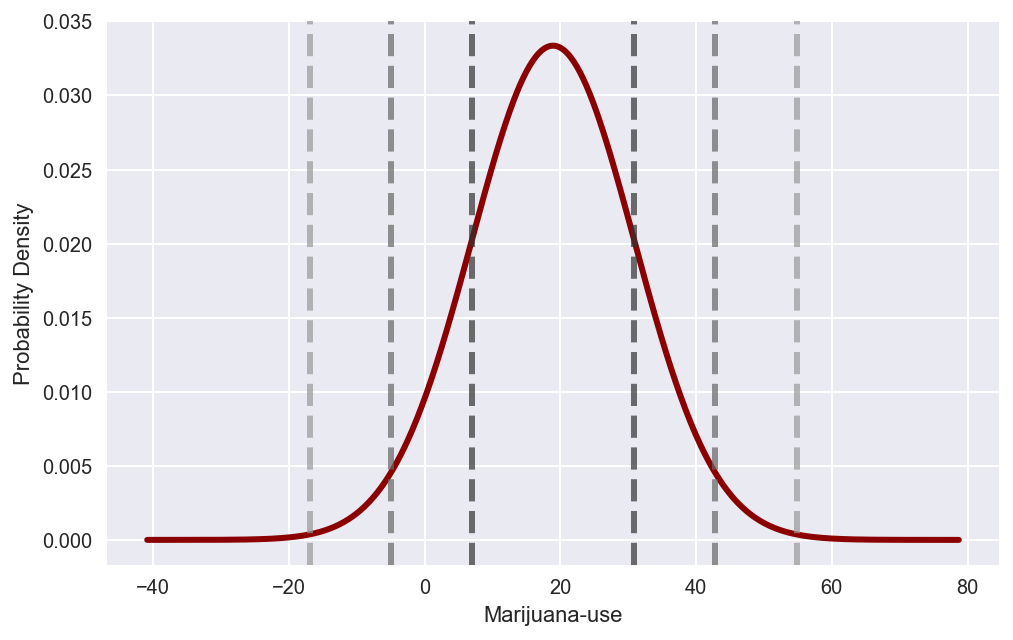

In [146]:
# 9.3.2 The distribution of marijuana variable from the drug dataset
mu = drug['marijuana-use'].mean()
sigma = drug['marijuana-use'].std()

xpoints = np.linspace(mu - 5*sigma, mu + 5*sigma, 500)
ypoints = stats.norm.pdf(xpoints, mu, sigma)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

# 68%:
ax.axvline(mu-sigma, ls='dashed', lw=3, color='#333333', alpha=0.7)
ax.axvline(mu+sigma, ls='dashed', lw=3, color='#333333', alpha=0.7)

# 95%
ax.axvline(mu-2*sigma, ls='dashed', lw=3, color='#666666', alpha=0.7)
ax.axvline(mu+2*sigma, ls='dashed', lw=3, color='#666666', alpha=0.7)

# 99.7%
ax.axvline(mu-3*sigma, ls='dashed', lw=3, color='#999999', alpha=0.7)
ax.axvline(mu+3*sigma, ls='dashed', lw=3, color='#999999', alpha=0.7)


plt.xlabel('Marijuana-use')
plt.ylabel('Probability Density')

In [147]:
#9.3.3 PERCENTILE DISTRIBUTION OF MARIJUANA-USE
drug['Pcent_marijuana']= [stats.percentileofscore(drug['marijuana-use'], i) for i in drug['marijuana-use']]

In [149]:
drug[['Pcent_marijuana']]

,Pcent_marijuana
0,5.882353
1,17.647059
2,29.411765
3,41.176471
4,58.823529
5,70.588235
6,94.117647
7,88.235294
8,100.000000
9,82.352941


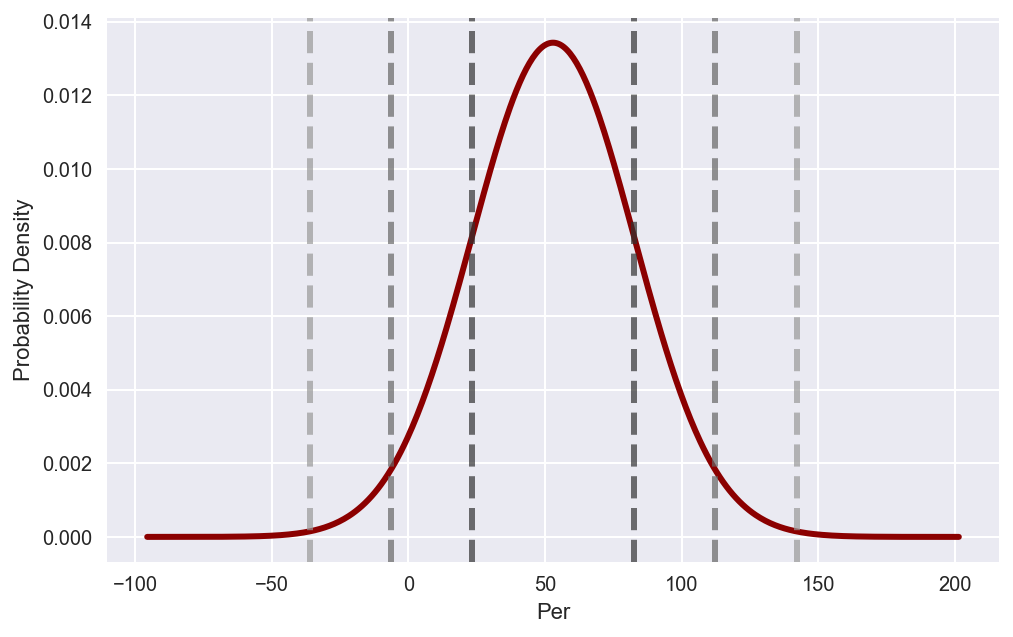

In [150]:
# 9.3.2 The distribution of percentage of marijuana use from the drug dataset

mu1 = drug['Pcent_marijuana'].mean()
sigma1 = drug['Pcent_marijuana'].std()

xpoints = np.linspace(mu1 - 5*sigma1, mu1 + 5*sigma1, 500)
ypoints = stats.norm.pdf(xpoints, mu1, sigma1)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

# 68%:
ax.axvline(mu1-sigma1, ls='dashed', lw=3, color='#333333', alpha=0.7)
ax.axvline(mu1+sigma1, ls='dashed', lw=3, color='#333333', alpha=0.7)

# 95%
ax.axvline(mu1-2*sigma1, ls='dashed', lw=3, color='#666666', alpha=0.7)
ax.axvline(mu1+2*sigma1, ls='dashed', lw=3, color='#666666', alpha=0.7)

# 99.7%
ax.axvline(mu1-3*sigma1, ls='dashed', lw=3, color='#999999', alpha=0.7)
ax.axvline(mu1+3*sigma1, ls='dashed', lw=3, color='#999999', alpha=0.7)


plt.xlabel('Per')
plt.ylabel('Probability Density')